# Ionisationskammer Datenauswertung

In [37]:
import os
import re
import glob
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import scipy
import scipy
from scipy.optimize import curve_fit
import matplotlib 
from pylab import *
from scipy import odr as odr
sns.set()

In [38]:
os.getcwd()

'/home/lentil93/Uni/RUB/Fortgeschrittene Praktika/319_ionisationskammerteleskope'

## Aufgabe 1: 

In [39]:
df_mess_1 = pd.read_csv("./aufgabe_1_daten.csv", sep = ";")
df_mess_1

,U_gitter,U_a(100),U_a(200),U_a(300)
0,0,"0,234","0,3406","1,7274"
1,20,"2,275","2,225","2,201"
2,40,"2,092","2,287","2,165"
3,60,"1,703","2,201","2,141"
4,80,"0,948","2,165","2,165"
5,100,"0,2554","2,007","2,251"
6,120,NaN,"1,934","2,214"
7,140,NaN,"1,532","2,116"
8,160,NaN,"1,265","1,946"
9,180,NaN,"0,7542","1,812"


In [40]:
df1m = df_mess_1.melt("U_gitter", var_name = "U_anode",value_name="vals")
df1m.dropna(axis = 0, inplace = True)
#df1m["U_anode"]= df1m["U_anode"].astype('string')
#df1m["cols"] = df1m["cols"].str.replace("U_a(100)",r"$U_{Anode}$ = 100")
#df1m["cols"] = df1m["cols"].str.replace("U_a(200)",r"$U_{Anode}$ = 200")
#df1m["cols"] = df1m["cols"].str.replace("U_a(300)",r"$U_{Anode}$ = 300")
df1m["U_anode"] = df1m["U_anode"].replace("U_a(100)","100")
df1m["U_anode"] = df1m["U_anode"].replace("U_a(200)","200")
df1m["U_anode"] = df1m["U_anode"].replace("U_a(300)","300")
df1m["vals"] = df1m["vals"].str.replace(",",".")
df1m["vals"] = df1m["vals"].astype(float)
df1m

,U_gitter,U_anode,vals
0,0,100,0.2340
1,20,100,2.2750
2,40,100,2.0920
3,60,100,1.7030
4,80,100,0.9480
5,100,100,0.2554
16,0,200,0.3406
17,20,200,2.2250
18,40,200,2.2870
19,60,200,2.2010


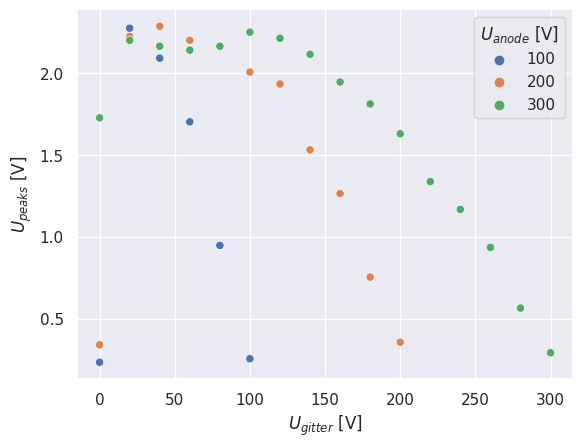

In [41]:
g = sns.scatterplot(data = df1m, x = "U_gitter",y = "vals",hue = "U_anode")
#plt.legend(title = "U_anode",loc = "upper right",labels = ["100","200","300"])
plt.xlabel(r"$U_{gitter}$ [V]")
plt.ylabel(r"$U_{peaks}$ [V]")
plt.legend(title = r"$U_{anode}$ [V]")
#print(L.get_texts())
#L.get_texts()[0].set_text(r"$U_{Anode}$ [V]")
plt.savefig("./2022_12_07/aufgabe_1.jpg")
plt.show(g)


In [42]:
#create latex table
print(df_mess_1.to_latex(index = False))

\begin{tabular}{rlll}
\toprule
 U\_gitter & U\_a(100) & U\_a(200) & U\_a(300) \\
\midrule
        0 &    0,234 &   0,3406 &   1,7274 \\
       20 &    2,275 &    2,225 &    2,201 \\
       40 &    2,092 &    2,287 &    2,165 \\
       60 &    1,703 &    2,201 &    2,141 \\
       80 &    0,948 &    2,165 &    2,165 \\
      100 &   0,2554 &    2,007 &    2,251 \\
      120 &      NaN &    1,934 &    2,214 \\
      140 &      NaN &    1,532 &    2,116 \\
      160 &      NaN &    1,265 &    1,946 \\
      180 &      NaN &   0,7542 &    1,812 \\
      200 &      NaN &   0,3567 &     1,63 \\
      220 &      NaN &      NaN &    1,338 \\
      240 &      NaN &      NaN &    1,168 \\
      260 &      NaN &      NaN &    0,936 \\
      280 &      NaN &      NaN &    0,565 \\
      300 &      NaN &      NaN &   0,2919 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_8391/294443831.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_mess_1.to_latex(index = False))


## Aufgabe 2:

### Kalibration

In [43]:
df_kali_2 = pd.read_csv("./aufgabe_2_kalibration.csv",sep=";")
df_kali_2["zeit"] = df_kali_2["zeit"].str.replace(",",".")
df_kali_2["spannung"]= df_kali_2["spannung"].str.replace(",",".")
cols = df_kali_2.columns
df_kali_2[cols] = df_kali_2[cols].apply(pd.to_numeric,errors = 'coerce')
df_kali_2

,zeit,spannung
0,0.5,1.2140
1,1.0,1.8976
2,2.0,3.9250
3,3.0,5.6280
4,4.0,7.6080


In [44]:
#fit linear regression

#get target and features
x = df_kali_2["spannung"].values.reshape(-1,1)
y = df_kali_2["zeit"].values.reshape(-1,1)

reg = LinearRegression().fit(df_kali_2["spannung"][:,None],df_kali_2["zeit"])
b = reg.intercept_
m = reg.coef_[0]
r2 = r2_score(y,reg.predict(x))
#plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')




/tmp/ipykernel_8391/325842534.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  reg = LinearRegression().fit(df_kali_2["spannung"][:,None],df_kali_2["zeit"])


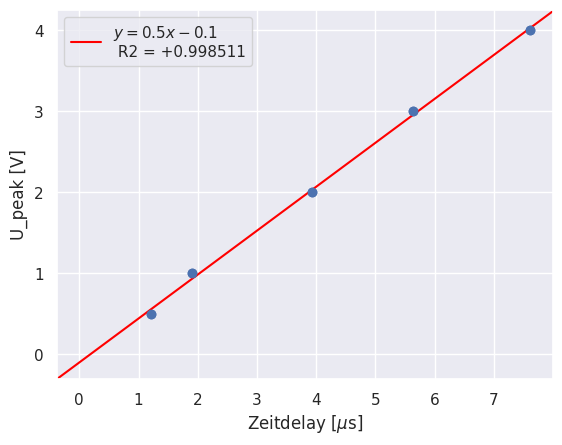

In [45]:
df_kali_2["yerr"] = 0.05
df_kali_2["xerr"] = df_kali_2["spannung"].apply(lambda x: x*0.001)

plt.scatter(x = df_kali_2["spannung"],y = df_kali_2["zeit"])
plt.errorbar(x = df_kali_2["spannung"],y = df_kali_2["zeit"],xerr = df_kali_2["xerr"],yerr = df_kali_2["yerr"],fmt = 'o',ecolor = "black")
plt.axline(xy1=(0, b), slope=m, c = 'red', label=f'$y = {m:.1f}x {b:+.1f}$ \n R2 = {r2:+.6f}')
plt.xlabel(r"Zeitdelay [$\mu$s]")
plt.ylabel("U_peak [V]")
plt.legend()

plt.show()

In [46]:
df_kali_2.sample(1)

,zeit,spannung,yerr,xerr
0,0.5,1.214,0.05,0.001214


p0 = 1.841 +- 0.041
p1 = 0.189 +- 0.101
Chi^2 = 16.306
red. Chi^2 = 5.435

Beta: [1.84067062 0.18883404]
Beta Std Error: [0.04149379 0.10073427]
Beta Covariance: [[ 0.00031676 -0.00065451]
 [-0.00065451  0.00186691]]
Residual Variance: 5.435394249846779
Inverse Condition #: 0.18110678448141576
Reason(s) for Halting:
  Sum of squares convergence


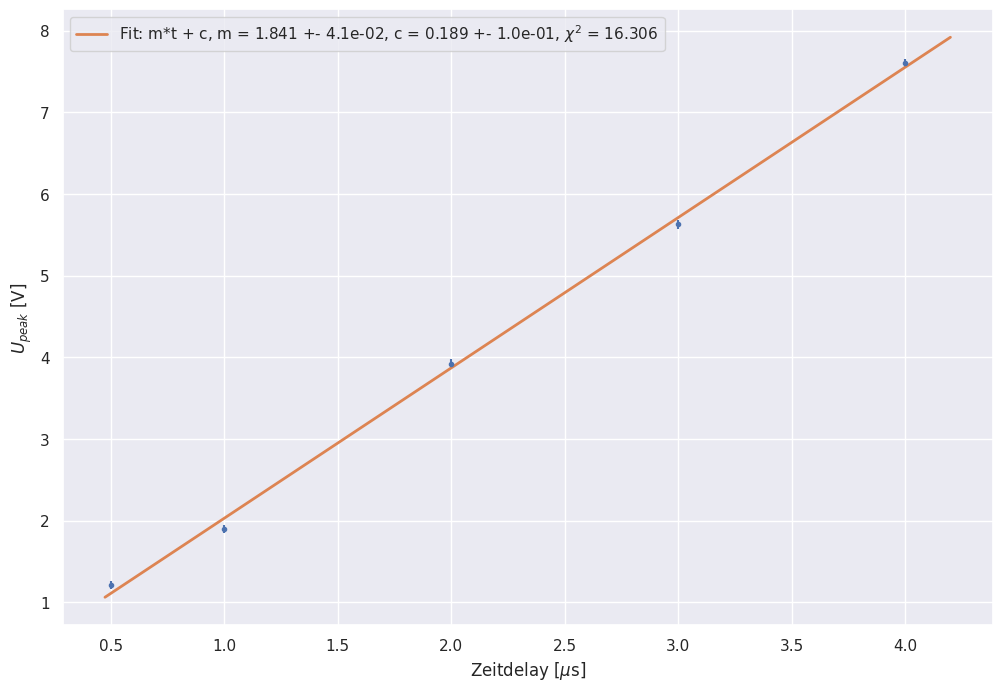

In [47]:


def odrFit(xValues, xErrors, yValues, yErrors, fitFunction, startParams):
    fitModel = odr.Model(fitFunction)
    data = odr.RealData(xValues, yValues, sx=xErrors, sy=yErrors)
    fitter = odr.ODR(data, fitModel, beta0=startParams)
    out = fitter.run()
    popt = out.beta
    perr = out.sd_beta

    ndof = xValues.size - startParams.size
    for index in range(0, popt.size):
        print('p' + str(index) + ' = ' + str(round(popt[index], 3)) 
              + ' +- ' + str(round(perr[index], 3)))
    print('Chi^2 = ' + str(round(out.sum_square, 3)))
    print('red. Chi^2 = ' + str(round(out.res_var, 3)))
    print()
    return popt,perr,out

def fitFunc(params, x):
    p0, p1 = params
    return (p0*x + p1)

# Define the numpy arrays with the data points and the corresponding errors:

xData = df_kali_2.zeit.to_numpy()
xErr = df_kali_2.xerr.to_numpy()
yData = df_kali_2.spannung.to_numpy()
yErr = df_kali_2.yerr.to_numpy()

# Set the start values for the parameters of our function, and call the fit routine. 
# Remember: all arguments of our fitFunc are numpy arrays:

startParameters = np.array([0.5, -1.0])
popt, perr, fitResult = odrFit(xData, xErr, yData, yErr, fitFunc, startParameters)
#print(popt)
#print(perr)
# Have a look to the fit result:
fitResult.pprint()

# Let's make a plot of the result:

x_fit = np.linspace(0.95*min(xData), 1.05*max(xData), 200)
fit = fitFunc(popt, x_fit)

# calculate the residuals in y direction
residuals = fitResult.eps / yErr

error_fmt = " +- {:.1e}"

fig1 = plt.figure(figsize=(12,8))
plt.errorbar(xData, yData, xerr = xErr, yerr = yErr, fmt = '.')
plt.plot(x_fit, fit, lw=2, label=
         'Fit: m*t + c, m = ' + str(round(popt[0], 3)) + error_fmt.format(perr[0]) 
         + ', c = ' + str(round(popt[1], 3)) + error_fmt.format(perr[1]) 
         + ', $\chi^2$ = ' + str(round(fitResult.sum_square, 3)))
plt.xlabel(r"Zeitdelay [$\mu$s]")
plt.ylabel(r"$U_{peak}$ [V]")
plt.legend()
#plt.title('Lebensdauer von Myonen')

# fig2 = plt.figure(figsize=(12,2.5))
# plot(xData, residuals,'or')
# plt.xlabel(r"Zeitdelay [$\mu$s]")
# plt.ylabel('Residuals')
# plt.grid()
plt.savefig("./2022_12_07/aufgabe_2_kali.jpg")
plt.show()

# The quite large values for Chi^2 and Chi^2/ndof show that this is not a good fit, what is aslo
# clearly visible in the plot. The statistical errors are not sufficient to explain the spread
# of the data points around the best curve.


In [48]:
df_kali_2_print=df_kali_2.copy()
df_kali_2_print[r"Zeitdelay [$\mu$s]"] = df_kali_2_print["zeit"].astype(str)+u"\u00B1"+df_kali_2_print["yerr"].astype(str)
df_kali_2_print["Spannung [V]"] = df_kali_2_print["spannung"].astype(str)+u"\u00B1"+df_kali_2_print["xerr"].astype(str)
df_kali_2_print.drop(["zeit","spannung","yerr","xerr"],axis = 1, inplace = True)
print(df_kali_2_print.to_latex(index = False))

\begin{tabular}{ll}
\toprule
Zeitdelay [\$\textbackslash mu\$s] &     Spannung [V] \\
\midrule
          0.5±0.05 &   1.214±0.001214 \\
          1.0±0.05 & 1.8976±0.0018976 \\
          2.0±0.05 &   3.925±0.003925 \\
          3.0±0.05 &   5.628±0.005628 \\
          4.0±0.05 &   7.608±0.007608 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_8391/381911514.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_kali_2_print.to_latex(index = False))


### Messungen

In [49]:
##NB zeit Spalte von lineare Regression von excel

df_mess_2 = pd.read_csv("./aufgabe_2_messung.csv",sep=";")
df_mess_2["peak"] = df_mess_2["peak"].str.replace(",",".")
df_mess_2["zeit"] = df_mess_2["zeit"].str.replace(",",".")
cols = df_mess_2.columns
df_mess_2[cols] = df_mess_2[cols].apply(pd.to_numeric,errors = 'coerce')

df_mess_2

,U_gitter,peak,zeit
0,10,8.3636,15.585288
1,20,7.8300,14.602930
2,30,7.7330,14.424353
3,40,7.6030,14.185023
4,50,7.4660,13.932806
5,60,7.6360,14.245776
6,80,7.5870,14.155567
7,100,7.4900,13.976990
8,120,7.6360,14.245776
9,140,7.5390,14.067199


In [50]:
# benutze lineare Regression um TAC-Signale in einer Zeit umzurechenen

df_mess_2["driftzeit"] = df_mess_2["peak"].apply(lambda x: (1/round(popt[0], 3))*(x-round(popt[1], 3)))
df_mess_2

,U_gitter,peak,zeit,driftzeit
0,10,8.3636,15.585288,4.440304
1,20,7.8300,14.602930,4.150462
2,30,7.7330,14.424353,4.097773
3,40,7.6030,14.185023,4.027159
4,50,7.4660,13.932806,3.952743
5,60,7.6360,14.245776,4.045084
6,80,7.5870,14.155567,4.018468
7,100,7.4900,13.976990,3.965779
8,120,7.6360,14.245776,4.045084
9,140,7.5390,14.067199,3.992395


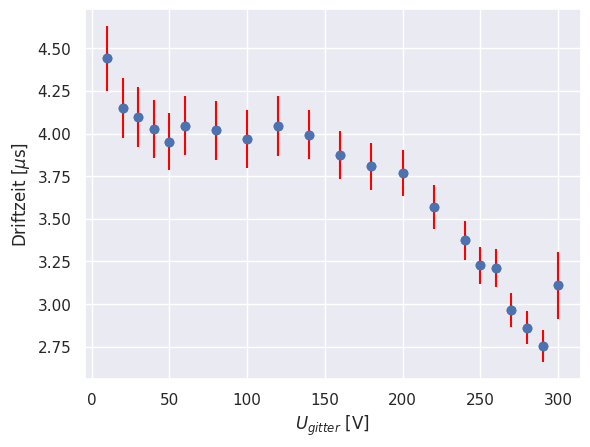

In [51]:
df_mess_2["xerr"] = df_mess_2["peak"].apply(lambda x : x*0.001)
df_mess_2["yerr"] = df_mess_2["driftzeit"]
for index,df in df_mess_2.iterrows():
    if df["U_gitter"] < 80:
        val = df["yerr"]*0.0426
        df_mess_2._set_value(index,"yerr",val)
    elif 80 <= df["U_gitter"] < 140:
        val = df["yerr"]*0.043
        df_mess_2._set_value(index,"yerr",val)
    elif 140 <= df["U_gitter"] < 240:
        val = df["yerr"]*0.03624
        df_mess_2._set_value(index,"yerr",val)
    elif 240 <= df["U_gitter"] < 300:
        val = df["yerr"]*0.034
        df_mess_2._set_value(index,"yerr",val)
    else:
        val = df["yerr"]*0.064
        df_mess_2._set_value(index,"yerr",val)
#df_mess_2["yerr"] = df_mess_2["driftzeit"].apply(lambda x : x*0.01)
#df_mess_2["yerr"].loc[df_mess_2.U_gitter == 300] = df_mess_2["yerr"].loc[df_mess_2.U_gitter == 300]*5
x = df_mess_2["U_gitter"]
y = df_mess_2["driftzeit"]

plt.scatter(x,y)
plt.errorbar(x,y,xerr=df_mess_2["xerr"],yerr=df_mess_2["yerr"],fmt="o",ecolor="red")
plt.xlabel(r"$U_{gitter}$ [V]")
plt.ylabel(r"Driftzeit [$\mu$s]")
plt.savefig("./2022_12_07/aufgabe_2_mess.jpg")
plt.show()


In [52]:
#get table for latex
df_mess_2_print = df_mess_2.copy()
df_mess_2_print["peak"].iloc[:] = df_mess_2_print["peak"].iloc[:].apply('{0:.3f}'.format)
df_mess_2_print["xerr"].iloc[:] = df_mess_2_print["xerr"].iloc[:].apply('{0:.4f}'.format)
df_mess_2_print["driftzeit"].iloc[:] = df_mess_2_print["driftzeit"].iloc[:].apply('{0:.2f}'.format)
df_mess_2_print["yerr"].iloc[:] = df_mess_2_print["yerr"].iloc[:].apply('{0:.3f}'.format)
df_mess_2_print[r"$U_{gitter}$ [V]"] = df_mess_2_print["U_gitter"]
df_mess_2_print[r"$U_{peak}$ [V]"] = df_mess_2_print["peak"]+u"\u00B1"+df_mess_2_print["xerr"]
df_mess_2_print[r"Driftzeit [$\mu$s]"] = df_mess_2_print["driftzeit"]+u"\u00B1"+df_mess_2_print["yerr"]
df_mess_2_print.drop(["zeit","peak","yerr","xerr"],axis = 1, inplace = True)
print(df_mess_2_print.to_latex(index = False))

\begin{tabular}{rlrll}
\toprule
 U\_gitter & driftzeit &  \$U\_\{gitter\}\$ [V] & \$U\_\{peak\}\$ [V] & Driftzeit [\$\textbackslash mu\$s] \\
\midrule
       10 &      4.44 &                10 &   8.364±0.0084 &         4.44±0.189 \\
       20 &      4.15 &                20 &   7.830±0.0078 &         4.15±0.177 \\
       30 &      4.10 &                30 &   7.733±0.0077 &         4.10±0.175 \\
       40 &      4.03 &                40 &   7.603±0.0076 &         4.03±0.172 \\
       50 &      3.95 &                50 &   7.466±0.0075 &         3.95±0.168 \\
       60 &      4.05 &                60 &   7.636±0.0076 &         4.05±0.172 \\
       80 &      4.02 &                80 &   7.587±0.0076 &         4.02±0.173 \\
      100 &      3.97 &               100 &   7.490±0.0075 &         3.97±0.171 \\
      120 &      4.05 &               120 &   7.636±0.0076 &         4.05±0.174 \\
      140 &      3.99 &               140 &   7.539±0.0075 &         3.99±0.145 \\
      160 &      3.

/tmp/ipykernel_8391/3723460045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mess_2_print["peak"].iloc[:] = df_mess_2_print["peak"].iloc[:].apply('{0:.3f}'.format)
/tmp/ipykernel_8391/3723460045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mess_2_print["xerr"].iloc[:] = df_mess_2_print["xerr"].iloc[:].apply('{0:.4f}'.format)
/tmp/ipykernel_8391/3723460045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mess_2_

## Aufgabe 3:

In [53]:
from copy import deepcopy
dict_storage = {}
dict_results = {}
dict_of_df = {}
for file in glob.glob("./2022_12_07/aufgabe_3/*g.txt"):
    dict_temp = {}
    print(file.split('.txt')[0])
    file_name = file.split('.txt')[0]
    #print(os.path.basename(file_name))
    #s = 'asdf=5;iwantthis123jasd'
    #result = re.search('asdf=5;(.*)123jasd', s)
    with open(file, encoding='utf8') as f:
            
        # To store lines
        
        for i, line in enumerate(f):
            #print(i)
            # read line 4 and 7

            if (i >9) & (i<=2057):
                words = line.strip().split("\t")
                
                dict_temp[words[0]] = words[1]
                #print(dict_temp)
            #elif i > 2058:
                # don't read after line 7 to save time
                #break
        #print(lines)





        #for line in f:
            #print(line.strip())
    #df = pd.read_csv(file,sep=";")
    #print(df)
    df = pd.DataFrame(data = dict_temp.items(), columns=["Volts","Events"])
    #df = pd.DataFrame.from_dict(dict_temp,orient = "index", columns =["Volts","Events"] )
    df["Volts"] = df["Volts"].str.replace(",",".")
    df["Events"]= df["Events"].str.replace(",",".")
    #print(df)
    for col in list(df.columns):
        df[f"{col}"]= pd.to_numeric(df[f"{col}"],errors = 'coerce')
    df.dropna(axis = 0, inplace =True)
    dict_of_df[f"{os.path.basename(file_name)}"] = deepcopy(df)
df_kali_3 = dict_of_df["Kalibireirung"]
df_mess_3 = dict_of_df["Messung"]

./2022_12_07/aufgabe_3/Kalibireirung
./2022_12_07/aufgabe_3/Messung


## Kalibration Peaks

[2022-12-17 09:57:48	Diagramm: ''Grafik1'']
Gauß-Fit Mehrere Peaks (3)  von Datensatz: Kalibireirung_1channel_2, unter Verwendung der Funktion: y0+sqrt(2/PI)*A1/w1*exp(-2*(x-xc1)^2/w1^2)+sqrt(2/PI)*A2/w2*exp(-2*(x-xc2)^2/w2^2)+sqrt(2/PI)*A3/w3*exp(-2*(x-xc3)^2/w3^2)
Sortieren: Nein
Gewichtungsmethode: Keine Gewichtung (alle w_i = 1)
Skalierter Levenberg-Marquardt Algorithmus mit Toleranz = 0,0001
Von x = 2,9300000000000e-02 bis x = 9,9951200000000e+00

Parameter                          Wert                                     Fehler                                   
-------------------------------------------------------------------------------------------------------------
A1 (Fläche 1)                      3,4996850408828e+00  1,6768510633099e-01   
xc1 (Mitte 1)                       4,8745323935009e+00  6,0264858509753e-03   
w1 (Breite 1)                      2,2549954184499e-01   1,2195684759769e-02   
A2 (Fläche 2)                      1,8258347922486e+01  1,5929339795336e-01   
xc2 (Mitte 2)                       3,9315822890307e+00  9,9942640808260e-04   
w2 (Breite 2)                      2,0475064962185e-01   2,0203576939170e-03   
A3 (Fläche 3)                      1,2303417643456e+01  1,4169122705092e-01   
xc3 (Mitte 3)                       2,6338715820556e+00  1,0630951481551e-03   
w3 (Breite 3)                      1,6398925219418e-01   2,1445243182947e-03   
y0 (Offset)                          7,5279869109512e-01   7,2227131983542e-02   
-------------------------------------------------------------------------------------------------------------
Fehler wurden skaliert mit sqrt(Chi^2/doF) = 2,9941069672548e+00

Statistiken                                                            Kalibireirung_1channel_2                               
-----------------------------------------------------------------------------------------------------------------------------
N (Datenpunkten)                                              2042                                                                       
Freiheitsgrade (doF)                                         2032                                                                       
Chi^2/doF                                                             8,9646765313636e+00                                    
RSS (Summe der quadrierten Restwerte)  1,8216222711731e+04                                    
R                                                                              9,6868129823682e-01                                     
R^2                                                                          9,3834345755378e-01                                     
Angepasstes R^2                                                9,3807037247405e-01                                     
RMSE (Standardabweichung)                         2,9941069672548e+00                                    
Iterationen                                                           13                                                                            
Status                                                                     success                                                                  
-----------------------------------------------------------------------------------------------------------------------------

Peak                                      Fläche                                  Mitte                                    Breite                                   Höhe                                     FWHM                                  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1                                             3,4996850408828e+00  4,8745323935009e+00  2,2549954184499e-01   1,2382928315272e+01  2,6550542064094e-01   
2                                             1,8258347922486e+01  3,9315822890307e+00  2,0475064962185e-01   7,1150220719806e+01  2,4107546698133e-01   
3                                             1,2303417643456e+01  2,6338715820556e+00  1,6398925219418e-01   5,9861892480606e+01  1,9308258911824e-01   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Messung Peaks

[2022-12-17 09:55:31	Diagramm: ''Grafik1'']
Gauß-Fit Mehrere Peaks (3)  von Datensatz: Messung_1channel_2, unter Verwendung der Funktion: y0+sqrt(2/PI)*A1/w1*exp(-2*(x-xc1)^2/w1^2)+sqrt(2/PI)*A2/w2*exp(-2*(x-xc2)^2/w2^2)+sqrt(2/PI)*A3/w3*exp(-2*(x-xc3)^2/w3^2)
Sortieren: Nein
Gewichtungsmethode: Keine Gewichtung (alle w_i = 1)
Skalierter Levenberg-Marquardt Algorithmus mit Toleranz = 0,0001
Von x = 2,9300000000000e-02 bis x = 9,9951200000000e+00

Parameter                          Wert                                     Fehler                                   
-------------------------------------------------------------------------------------------------------------
A1 (Fläche 1)                      5,2148085892704e+00  2,1049130576596e-01   
xc1 (Mitte 1)                       4,6314358427946e+00  6,2056450418456e-03   
w1 (Breite 1)                      2,7791277363343e-01   1,2594472890333e-02   
A2 (Fläche 2)                      2,1377958491203e+01  1,7556590473812e-01   
xc2 (Mitte 2)                       3,6458241180210e+00  9,1033874489117e-04   
w2 (Breite 2)                      1,9800275034665e-01   1,8398646516455e-03   
A3 (Fläche 3)                      1,5302655579652e+01  1,5654878303010e-01   
xc3 (Mitte 3)                       2,2169254871688e+00  9,1767056452499e-04   
w3 (Breite 3)                      1,5929232826806e-01   1,8509269885154e-03   
y0 (Offset)                          6,9628685980654e-01   8,1531427176003e-02   
-------------------------------------------------------------------------------------------------------------
Fehler wurden skaliert mit sqrt(Chi^2/doF) = 3,3578015142982e+00

Statistiken                                                            Messung_1channel_2                                       
-----------------------------------------------------------------------------------------------------------------------------
N (Datenpunkten)                                              2042                                                                       
Freiheitsgrade (doF)                                         2032                                                                       
Chi^2/doF                                                             1,1274831009423e+01                                    
RSS (Summe der quadrierten Restwerte)  2,2910456611148e+04                                    
R                                                                              9,7329258669243e-01                                     
R^2                                                                          9,4729845931045e-01                                     
Angepasstes R^2                                                9,4706503713219e-01                                     
RMSE (Standardabweichung)                         3,3578015142982e+00                                    
Iterationen                                                           13                                                                            
Status                                                                     success                                                                  
-----------------------------------------------------------------------------------------------------------------------------

Peak                                      Fläche                                  Mitte                                    Breite                                   Höhe                                     FWHM                                  
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1                                             5,2148085892704e+00  4,6314358427946e+00  2,7791277363343e-01   1,4971658936445e+01  3,2721728506107e-01   
2                                             2,1377958491203e+01  3,6458241180210e+00  1,9800275034665e-01   8,6145990354948e+01  2,3313042274377e-01   
3                                             1,5302655579652e+01  2,2169254871688e+00  1,5929232826806e-01   7,6649972783005e+01  1,8755238381264e-01   
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



In [54]:
def get_dE(E_a,U_p,druck):
    k_1 = 0.0000000554
    k_2 = 11.354132
    return ( k_1 * (druck/E_a) * np.log(k_2*E_a) )

In [58]:
def fill_dataframe(params_1,params_2,params_3):
    dict_vals = {}
    dict_vals_string ={}
    dict_vals[r"$^{148}Gd"] = [3.180,0.195,0.002,2.985,0.0021,params_3[3],0.0011]
    dict_vals[r"$^{230}Th"] = [4.684,0.145,0.002,4.537,0.0021,params_2[3],0.0061]
    dict_vals[r"$^{244}Cm"] = [5.806,0.125,0.002,5.681,0.0021,params_1[3],0.0009]
    df_vals = pd.DataFrame.from_dict(dict_vals,orient = "index",columns=["E_a","dE","dEerr","E_rest","E_resterr","U_peak","Uerr"])


    dict_vals_string[r"$^{148}Gd"] = ["3.180",u"0.195\u00B10.002",u"2.985\u00B10.0021",f"{params_3[3]}"+u"\u00B10.0011"]
    dict_vals_string[r"$^{230}Th"] = ["4.684",u"0.145\u00B10.002",u"4.537\u00B10.0021",f"{params_2[3]}"+u"\u00B10.0061"]
    dict_vals_string[r"$^{244}Cm"] = ["5.806",u"0.125\u00B10.002",u"5.681\u00B10.0021",f"{params_1[3]}"+u"\u00B10.0009"]
    df_vals_string = pd.DataFrame.from_dict(dict_vals_string,orient='index',columns=[r"$E_{\alpha}$","dE",r"$E_{rest}$",r"$U_{peak}$"])
    print(df_vals_string.to_latex())
    return df_vals

/tmp/ipykernel_8391/1379439998.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_vals_string.to_latex())
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


\begin{tabular}{lllll}
\toprule
{} & \$E\_\{\textbackslash alpha\}\$ &           dE &    \$E\_\{rest\}\$ &     \$U\_\{peak\}\$ \\
\midrule
\$\textasciicircum \{148\}Gd &        3.180 &  0.195±0.002 &  2.985±0.0021 &  2.6338±0.0011 \\
\$\textasciicircum \{230\}Th &        4.684 &  0.145±0.002 &  4.537±0.0021 &  3.9315±0.0061 \\
\$\textasciicircum \{244\}Cm &        5.806 &  0.125±0.002 &  5.681±0.0021 &  4.8745±0.0009 \\
\bottomrule
\end{tabular}



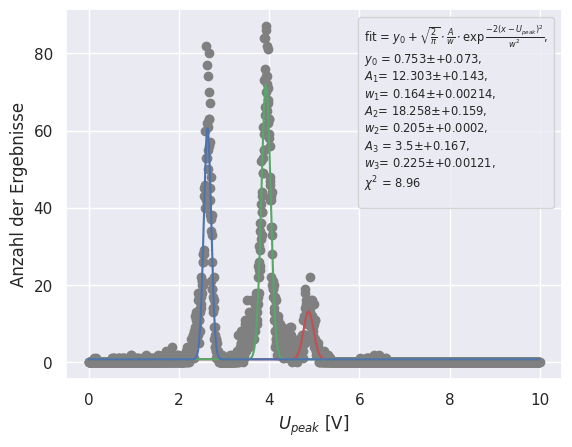

In [59]:
def get_gauss_curve(x,y0,A,w,mu):
    return (y0+np.sqrt(2/np.pi)*(A/w)*np.exp(-2*(x-mu)**2/w**2)),[y0,A,w,mu]


xData = df_kali_3.Volts.to_numpy()
yData_kal = df_kali_3.Events.to_numpy()

##nB peaks labeled in wrong order, from l-r 3,2,1
y_1_kal,params_1 = get_gauss_curve(xData,0.75279,3.49968,0.22549,4.8745)
y_2_kal,params_2 = get_gauss_curve(xData,0.75279,18.258,0.20475,3.9315)
y_3_kal,params_3 = get_gauss_curve(xData,0.75279,12.3034,0.16398,2.6338)

df_vals = fill_dataframe(params_1,params_2,params_3)

plt.plot(xData,y_1_kal,color='r')
plt.plot(xData,y_2_kal,color = 'g')
plt.plot(xData,y_3_kal,color = 'b')
plt.scatter(xData,yData_kal,color = 'grey')
plt.xlabel(r"$U_{peak}$ [V]")
plt.ylabel(r"Anzahl der Ergebnisse")
plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title=
         r'fit = $y_{0}+\sqrt{\frac{2}{\pi}}\cdot\frac{A}{w}\cdot\exp{\frac{-2(x-U_{peak})^2}{w^2}}$'+',\n'
         +r'$y_0$ = ' + str(round(params_1[0], 3)) +u"\u00B1"+ '+0.073' +',\n'
         +r'$A_1$= ' + str(round(params_3[1], 3)) +u"\u00B1"+ "+0.143"+",\n" 
         +r'$w_1$= ' + str(round(params_3[2], 3)) +u"\u00B1"+ "+0.00214"+",\n" 
         +r'$A_2$= ' + str(round(params_2[1], 3)) +u"\u00B1"+ "+0.159"+",\n" 
         +r'$w_2$= ' + str(round(params_2[2], 3)) +u"\u00B1"+ "+0.0002"+",\n" 
         +r'$A_3$ = ' + str(round(params_1[1], 3)) +u"\u00B1"+ "+0.167"+",\n" 
         +r'$w_3$= ' + str(round(params_1[2], 3)) +u"\u00B1"+ "+0.00121"+",\n" 
         + r'$\chi^2$ = 8.96'
         )
plt.savefig("./2022_12_07/auf_3_kal.jpg")
plt.show()



In [60]:
df_vals

,E_a,dE,dEerr,E_rest,E_resterr,U_peak,Uerr
$^{148}Gd,3.180,0.195,0.002,2.985,0.0021,2.6338,0.0011
$^{230}Th,4.684,0.145,0.002,4.537,0.0021,3.9315,0.0061
$^{244}Cm,5.806,0.125,0.002,5.681,0.0021,4.8745,0.0009


p0 = 1.203 +- 0.002
p1 = -0.184 +- 0.007
Chi^2 = 1.439
red. Chi^2 = 1.439

Beta: [ 1.20315414 -0.18426779]
Beta Std Error: [0.00183409 0.00727812]
Beta Covariance: [[ 2.33795503e-06 -8.91927582e-06]
 [-8.91927582e-06  3.68156818e-05]]
Residual Variance: 1.4388151944285617
Inverse Condition #: 0.058764596847768746
Reason(s) for Halting:
  Sum of squares convergence


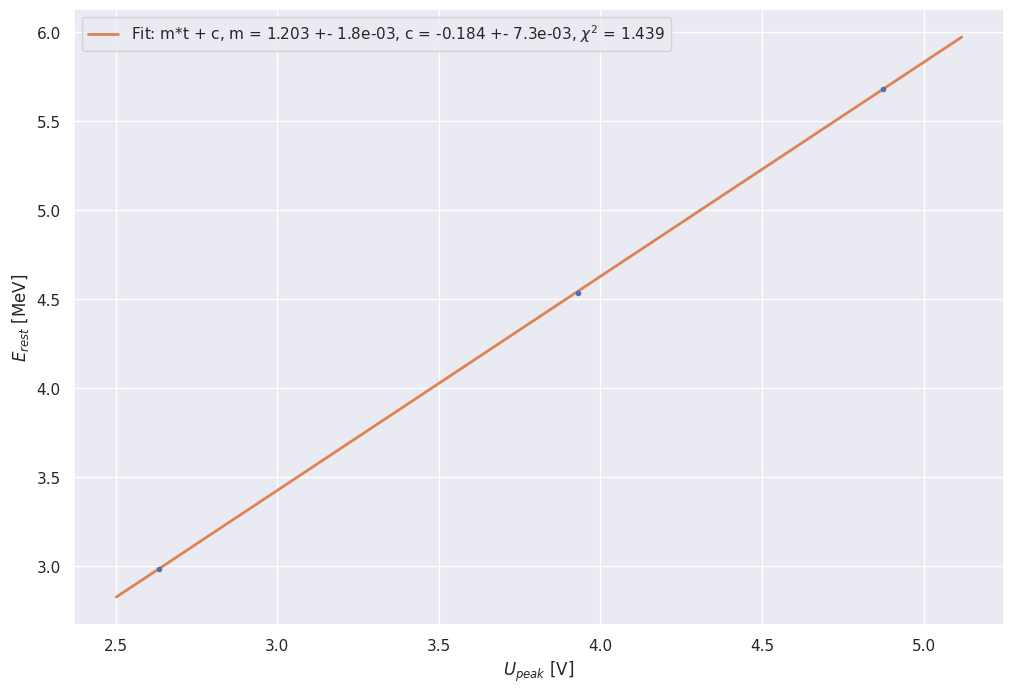

In [61]:
xData = df_vals.U_peak.to_numpy()
xErr = df_vals.Uerr.to_numpy()
yData = df_vals.E_rest.to_numpy()
yErr = df_vals.E_resterr.to_numpy()

# Set the start values for the parameters of our function, and call the fit routine. 
# Remember: all arguments of our fitFunc are numpy arrays:

startParameters = np.array([0.5, -1.0])
popt, perr, fitResult = odrFit(xData, xErr, yData, yErr, fitFunc, startParameters)
#print(popt)
#print(perr)
# Have a look to the fit result:
fitResult.pprint()

# Let's make a plot of the result:

x_fit = np.linspace(0.95*min(xData), 1.05*max(xData), 200)
fit = fitFunc(popt, x_fit)

# calculate the residuals in y direction
residuals = fitResult.eps / yErr

error_fmt = " +- {:.1e}"

fig1 = plt.figure(figsize=(12,8))
plt.errorbar(xData, yData, xerr = xErr, yerr = yErr, fmt = '.')
plt.plot(x_fit, fit, lw=2, label=
         'Fit: m*t + c, m = ' + str(round(popt[0], 3)) + error_fmt.format(perr[0]) 
         + ', c = ' + str(round(popt[1], 3)) + error_fmt.format(perr[1]) 
         + ', $\chi^2$ = ' + str(round(fitResult.sum_square, 3)))
plt.xlabel(r"$U_{peak}$ [V]")
plt.ylabel(r"$E_{rest}$ [MeV]")
plt.legend()
#plt.title('Lebensdauer von Myonen')

# fig2 = plt.figure(figsize=(12,2.5))
# plot(xData, residuals,'or')
# plt.xlabel(r"Zeitdelay [$\mu$s]")
# plt.ylabel('Residuals')
# plt.grid()
plt.savefig("./2022_12_07/aufgabe_3_kali_lin.jpg")
plt.show()


In [62]:
def calc_final_result(dE):
    t = 296
    p = 18.157
    M = 58.12
    dx = 0.0109
    R = 8.314
    rho = 59
    #return ((M*p)/(R*t)*1336)
    return(dE/(rho*dx))

In [63]:
def auf_3_mess(params_1,params_2,params_3,popt):
    dict_auf_3 = {}##kamerdruck = 18.157
    dE_1 = (5.806-(popt[0]*params_1[3] +popt[1]))
    dE_2 = (4.684-(popt[0]*params_2[3] +popt[1]))
    dE_3 = (3.180-(popt[0]*params_3[3] +popt[1]))
    dict_auf_3[r"$^{148}Gd"] = [3.180,params_3[3],0.0011,dE_3,0.012,calc_final_result(dE_3),0.12]
    dict_auf_3[r"$^{230}Th"] = [4.684,params_2[3],0.0061,dE_2,0.014,calc_final_result(dE_2),0.14]
    dict_auf_3[r"$^{244}Cm"] = [5.806,params_1[3],0.0009,dE_1,0.018,calc_final_result(dE_1),0.15]

    df_results = pd.DataFrame.from_dict(dict_auf_3,orient = "index",columns=["E_a","U_peak","Uerr","dE","dEerr","dE_norm","normerr",])
    return df_results
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


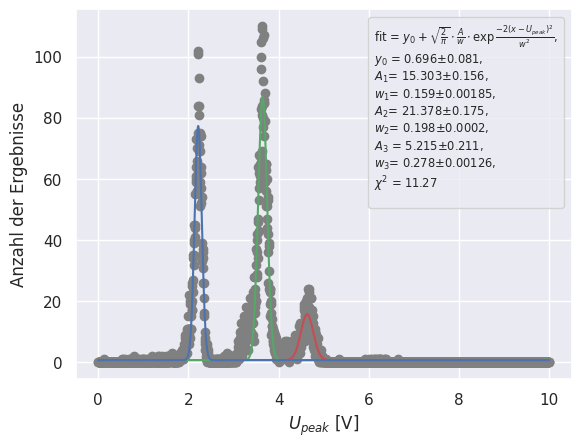

In [64]:
xData = df_mess_3.Volts.to_numpy()
yData_mess = df_mess_3.Events.to_numpy()
y_1_mess,params_1 = get_gauss_curve(xData,0.69628,5.2148,0.27791,4.63143)
y_2_mess,params_2 = get_gauss_curve(xData,0.69628,21.37795,0.1980,3.64582)
y_3_mess,params_3 = get_gauss_curve(xData,0.69628,15.3026,0.15929,2.21692)

df_results = auf_3_mess(params_1,params_2,params_3,popt)
plt.plot(xData,y_1_mess,color='r')
plt.plot(xData,y_2_mess,color = 'g')
plt.plot(xData,y_3_mess,color = 'b')
plt.scatter(xData,yData_mess,color = 'grey')
plt.xlabel(r"$U_{peak}$ [V]")
plt.ylabel(r"Anzahl der Ergebnisse")
plt.rcParams['legend.title_fontsize'] = 'x-small'
plt.legend(title=
         r'fit = $y_{0}+\sqrt{\frac{2}{\pi}}\cdot\frac{A}{w}\cdot\exp{\frac{-2(x-U_{peak})^2}{w^2}}$'+',\n'
         +r'$y_0$ = ' + str(round(params_1[0], 3)) +u"\u00B1"+ '0.081'+",\n"
         +r'$A_1$= ' + str(round(params_3[1], 3)) +u"\u00B1"+ "0.156"+",\n" 
         +r'$w_1$= ' + str(round(params_3[2], 3)) +u"\u00B1"+ "0.00185"+",\n" 
         +r'$A_2$= ' + str(round(params_2[1], 3)) +u"\u00B1"+ "0.175"+",\n"
         +r'$w_2$= ' + str(round(params_2[2], 3))+u"\u00B1" + "0.0002"+",\n" 
         +r'$A_3$ = ' + str(round(params_1[1], 3)) +u"\u00B1"+ "0.211"+",\n" 
         +r'$w_3$= ' + str(round(params_1[2], 3)) +u"\u00B1"+ "0.00126"+",\n" 
         + r'$\chi^2$ = 11.27'
         )
plt.savefig("./2022_12_07/auf_3_mess.jpg")
plt.show()


In [65]:
df_res = df_results.copy()
df_res["U_peak"] = df_res["U_peak"].astype(str)+u"\u00B1"+df_res["Uerr"].astype(str)
df_res["dE"] = df_res["dE"].astype(str)+u"\u00B1"+df_res["dEerr"].astype(str)
df_res["dE_norm"] = df_res["dE_norm"].astype(str)+u"\u00B1"+df_res["normerr"].astype(str)
df_res.drop(["Uerr","dEerr","normerr"],axis = 1, inplace = True)
print(df_res.to_latex())

\begin{tabular}{lrlll}
\toprule
{} &    E\_a &          U\_peak &                        dE &                  dE\_norm \\
\midrule
\$\textasciicircum \{148\}Gd &  3.180 &  2.21692±0.0011 &  0.6969713164714424±0.012 &  1.0837681798654057±0.12 \\
\$\textasciicircum \{230\}Th &  4.684 &  3.64582±0.0061 &  0.4817843674896327±0.014 &  0.7491593336800384±0.14 \\
\$\textasciicircum \{244\}Cm &  5.806 &  4.63143±0.0009 &  0.4179436167121384±0.018 &  0.6498890012628493±0.15 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_8391/2667044040.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_res.to_latex())


In [66]:
#print(df_results.to_latex())
df_results

,E_a,U_peak,Uerr,dE,dEerr,dE_norm,normerr
$^{148}Gd,3.180,2.21692,0.0011,0.696971,0.012,1.083768,0.12
$^{230}Th,4.684,3.64582,0.0061,0.481784,0.014,0.749159,0.14
$^{244}Cm,5.806,4.63143,0.0009,0.417944,0.018,0.649889,0.15


# Vorbereitung 3 + Aufgabe 3

In [67]:
def get_curve(x,l_vals):
    
    return (l_vals[0]/x)*np.log(l_vals[1]*x)/1000
    #return np.multiply((l_vals[0]/x),np.log(l_vals[1]*x))

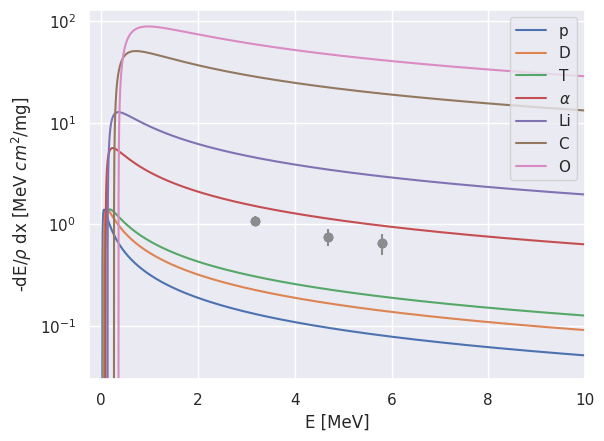

In [80]:
#create xarray
xData = np.arange(0.001,10,0.001)
xData = xData.astype(float)
#xData = xData*10000000000000000000000
#xData = xData/100000000000000
#define constants
# N_a = 602200000000000000000000
# r_e = 0.000000000000002818
# m_e = 0.511
# Z = 34
# A = 58.12
# I = 48.3
dict_plot = {}
dict_plot["p"] = [84,45.1]
dict_plot["D"] = [168,22.6]
dict_plot["T"] = [252,15.1]
dict_plot[r"$\alpha$"] = [1339,11.4]
dict_plot["Li"] = [4529,7.6]
dict_plot["C"] = [36144,3.8]
dict_plot["O"] = [85627,2.8]

dict_store = {}
dict_store["xData"] = xData

"""for item in dict_plot.keys():
    fig = plt.figure()
    ax 
    plt.plot(xData,get_curve(xData,dict_plot[item]))
    #plt.xlim([0,0.01])
    plt.ylim([-3,1000])
    ax.set_yscale('log')
    #plt.plot(xData,((dict_plot[item][0]/xData)*np.log(dict_plot[item][1]*xData)))
    #print(dict_plot[item][0])
    dict_store[item] = get_curve(xData,dict_plot[item])
df_curves.head()
y = get_curve(xData,dict_plot['p'])"""

for item in dict_plot.keys():
    dict_store[item] = get_curve(xData,dict_plot[item])
    plt.plot(xData,get_curve(xData,dict_plot[item]))
    plt.yscale('log')
    plt.xlim([-0.25,10])
    #plt.ylim([-0.5,1000])
    #plt.legend(item)
plt.xlabel("E [MeV]")
plt.ylabel(r"-dE/$\rho$ dx [MeV $cm^{2}$/mg]")
plt.rcParams['legend.title_fontsize'] = 'xx-small'
plt.legend(dict_plot.keys(),loc=1)
plt.savefig("./2022_12_07/vor_3.jpg")
plt.scatter(df_results.E_a,df_results.dE_norm)
plt.errorbar(df_results.E_a,df_results.dE_norm,yerr=df_results.normerr,fmt="o")
plt.savefig("./2022_12_07/auf_3_final_results.jpg")
plt.show()

df_curves = pd.DataFrame.from_dict(dict_store)


#df_curves.head()


In [ ]:
dict_store

{'xData': array([1.000e-03, 2.000e-03, 3.000e-03, ..., 9.997e+00, 9.998e+00,
        9.999e+00]),
 'p': array([-2.60305335e+05, -1.01040486e+05, -5.60073008e+04, ...,
         5.13492100e+01,  5.13449145e+01,  5.13406197e+01]),
 'd': array([-6.36687303e+05, -2.60119288e+05, -1.50706813e+05, ...,
         9.10872734e+01,  9.10798436e+01,  9.10724151e+01]),
 't': array([-1.05665125e+06, -4.40989083e+05, -2.59933653e+05, ...,
         1.26465831e+02,  1.26455703e+02,  1.26445576e+02]),
 'He': array([-5.99087604e+06, -2.53137598e+06, -1.50661139e+06, ...,
         6.34327094e+02,  6.34277045e+02,  6.34227004e+02]),
 'Li': array([-2.20997402e+07, -9.48023833e+06, -5.70804173e+06, ...,
         1.96184179e+03,  1.96169088e+03,  1.96153999e+03]),
 'C': array([-2.01421628e+08, -8.81842583e+07, -5.39044619e+07, ...,
         1.31505521e+04,  1.31495984e+04,  1.31486448e+04]),
 'O': array([-5.03327139e+08, -2.21987513e+08, -1.36418755e+08, ...,
         2.85386600e+04,  2.85366622e+04,  2.853466

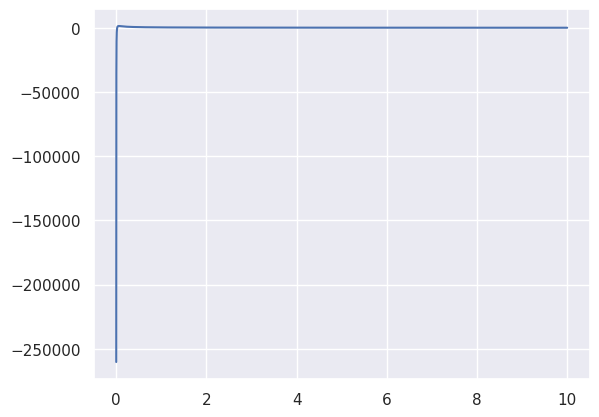

In [ ]:
plt.plot(xData,y)